In [3]:
import os
import json
import numpy as np
import pandas as pd

# Параметры проекта
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/eval_final_experiments"

models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
orig_splits = ["rare_forget10", "popular_forget10"]
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]

# Список сплитов валидации, для которых существуют папки on_<split>
eval_splits = [
    "rare_forget10",
    "popular_forget10",
    "duplicate_entities_rare_forget10",
    "duplicate_entities_popular_forget10",
    "duplicate_answers_rare_forget10",
    "duplicate_answers_popular_forget10",
    "retain_intersection80",
]

# Словарь для хранения итоговых таблиц:
# ключ — кортеж (model, orig_split), значение — DataFrame
tables = {}

for model in models:
    for orig in orig_splits:
        # Варианты, которые будем сравнивать
        variants = ["FT"] + trainers

        # Собираем данные: для каждого варианта список значений по eval_splits
        data = {variant: [] for variant in variants}

        for variant in variants:
            if variant == "FT":
                parent_dir = os.path.join(BASE, model, "Original")
            else:
                parent_dir = os.path.join(BASE, model, f"{orig}_{variant}")

            for split in eval_splits:
                summary_path = os.path.join(parent_dir, f"on_{split}", "PopQA_SUMMARY.json")
                try:
                    with open(summary_path, "r") as f:
                        summary = json.load(f)
                    # Извлекаем метрику forget_Q_A_ROUGE
                    value = summary.get("forget_Q_A_ROUGE", np.nan)
                except FileNotFoundError:
                    value = np.nan
                except json.JSONDecodeError:
                    value = np.nan

                data[variant].append(value)

        # Собираем DataFrame: строки — сплиты, столбцы — варианты
        df = pd.DataFrame(data, index=eval_splits)
        df.index.name = "eval_split"

        tables[(model, orig)] = df

# Пример: выводим все таблицы
for (model, orig), df in tables.items():
    print(f"\n=== Results for {model}, unlearn on '{orig}' ===")
    display(df)



=== Results for Llama-3.2-1B-Instruct, unlearn on 'rare_forget10' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget10,0.160291,0.018920,0.155282,0.073998,0.164617
popular_forget10,0.456340,0.224753,0.444381,0.372437,0.443052
duplicate_entities_rare_forget10,0.132323,0.068687,0.128283,0.090909,0.111111
duplicate_entities_popular_forget10,0.114796,0.083333,0.106293,0.108844,0.125000
duplicate_answers_rare_forget10,0.353342,0.174542,0.362495,0.268838,0.352490
duplicate_answers_popular_forget10,0.348033,0.193064,0.366460,0.295445,0.348447
retain_intersection80,0.129049,0.056190,0.127836,0.090993,0.125445



=== Results for Llama-3.2-1B-Instruct, unlearn on 'popular_forget10' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget10,0.160291,0.157559,0.158242,0.158015,0.157332
popular_forget10,0.456340,0.099658,0.431663,0.128512,0.442103
duplicate_entities_rare_forget10,0.132323,0.051515,0.116162,0.048485,0.120202
duplicate_entities_popular_forget10,0.114796,0.056122,0.125000,0.066327,0.117347
duplicate_answers_rare_forget10,0.353342,0.322691,0.350362,0.344615,0.352490
duplicate_answers_popular_forget10,0.348033,0.272050,0.355694,0.290683,0.353416
retain_intersection80,0.129049,0.077498,0.127265,0.089868,0.131023



=== Results for Llama-3.2-3B-Instruct, unlearn on 'rare_forget10' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget10,0.211310,0.051020,0.222450,0.046556,0.221995
popular_forget10,0.816239,0.527066,0.821754,0.547009,0.821944
duplicate_entities_rare_forget10,0.282828,0.164646,0.277778,0.196970,0.292929
duplicate_entities_popular_forget10,0.336735,0.136905,0.338435,0.224490,0.336735
duplicate_answers_rare_forget10,0.517667,0.279268,0.508727,0.399745,0.509366
duplicate_answers_popular_forget10,0.556315,0.355280,0.560455,0.494203,0.557350
retain_intersection80,0.340990,0.133029,0.338707,0.227749,0.340305



=== Results for Llama-3.2-3B-Instruct, unlearn on 'popular_forget10' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget10,0.211310,0.166894,0.230647,0.051020,0.226776
popular_forget10,0.816239,0.087320,0.816629,0.535256,0.802961
duplicate_entities_rare_forget10,0.282828,0.033333,0.268687,0.027273,0.269697
duplicate_entities_popular_forget10,0.336735,0.035714,0.318878,0.055272,0.329082
duplicate_answers_rare_forget10,0.517667,0.317795,0.516390,0.385909,0.511281
duplicate_answers_popular_forget10,0.556315,0.245756,0.556315,0.308489,0.565010
retain_intersection80,0.340990,0.087525,0.338687,0.126789,0.339135



=== Results for Llama-3.1-8B-Instruct, unlearn on 'rare_forget10' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget10,0.968579,0.633424,0.949454,0.762523,0.949454
popular_forget10,1.000000,0.967540,1.000000,0.990888,1.000000
duplicate_entities_rare_forget10,0.981818,0.836364,0.981818,0.951515,0.981818
duplicate_entities_popular_forget10,1.000000,0.895408,0.994898,0.938776,0.994898
duplicate_answers_rare_forget10,0.987867,0.765006,0.987867,0.916773,0.989144
duplicate_answers_popular_forget10,0.988820,0.762112,0.985714,0.915528,0.986957
retain_intersection80,0.989485,0.866781,0.989247,0.935627,0.985941



=== Results for Llama-3.1-8B-Instruct, unlearn on 'popular_forget10' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget10,0.968579,0.766621,0.967213,0.939208,0.969262
popular_forget10,1.000000,0.191344,1.000000,0.411162,0.995444
duplicate_entities_rare_forget10,0.981818,0.309091,0.981818,0.759596,0.981818
duplicate_entities_popular_forget10,1.000000,0.318027,1.000000,0.772959,0.994898
duplicate_answers_rare_forget10,0.987867,0.757344,0.989144,0.946999,0.987867
duplicate_answers_popular_forget10,0.988820,0.564182,0.988199,0.833540,0.985714
retain_intersection80,0.989485,0.408697,0.989485,0.831287,0.988914


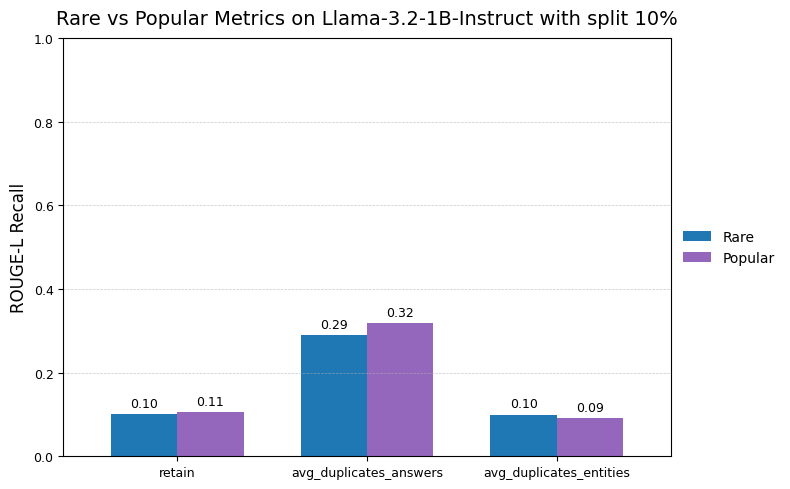

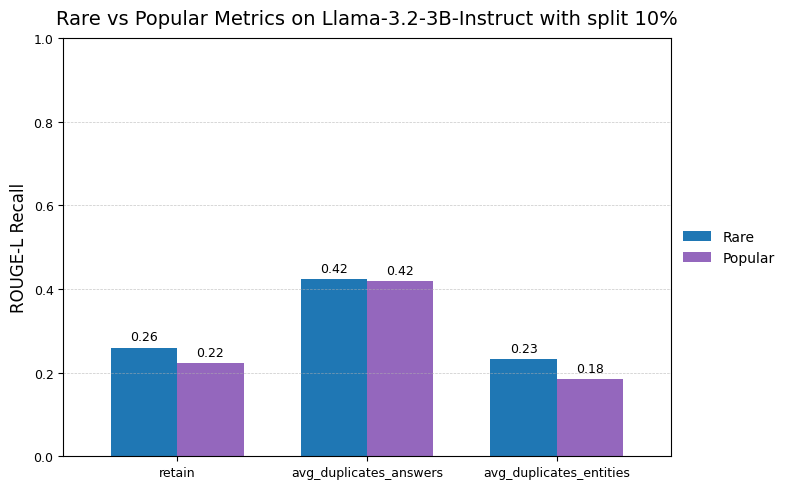

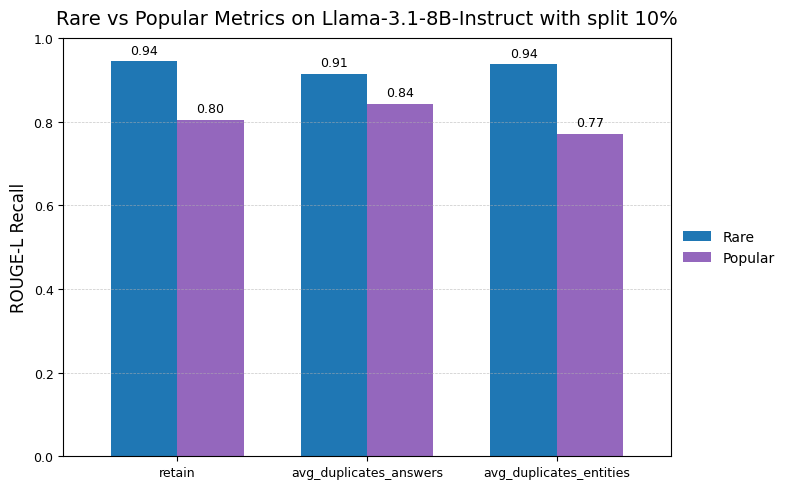

In [9]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Чтение данных ----------
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/eval_final_experiments"

models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
orig_splits = ["rare_forget10", "popular_forget10"]
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]

eval_splits = [
    "rare_forget10",
    "popular_forget10",
    "duplicate_entities_rare_forget10",
    "duplicate_entities_popular_forget10",
    "duplicate_answers_rare_forget10",
    "duplicate_answers_popular_forget10",
    "retain_intersection80",
]

# Собираем таблицы для каждой (model, orig_split)
tables = {}
for model in models:
    for orig in orig_splits:
        data = {v: [] for v in trainers}
        for v in trainers:
            path_dir = os.path.join(BASE, model, f"{orig}_{v}")
            for split in eval_splits:
                path = os.path.join(path_dir, f"on_{split}", "PopQA_SUMMARY.json")
                try:
                    with open(path, "r") as f:
                        summary = json.load(f)
                    val = summary.get("forget_Q_A_ROUGE", np.nan)
                except (FileNotFoundError, json.JSONDecodeError):
                    val = np.nan
                data[v].append(val)
        tables[(model, orig)] = pd.DataFrame(data, index=eval_splits)

# ---------- 2. Построение графиков средних с новыми цветами ----------
metrics = ['retain', 'avg_duplicates_answers', 'avg_duplicates_entities']
colors = ['tab:blue', 'tab:purple']  # синий и фиолетовый

for model in models:
    df_r = tables[(model, "rare_forget10")]
    df_p = tables[(model, "popular_forget10")]
    
    avg_rare = df_r.mean(axis=1)
    avg_pop  = df_p.mean(axis=1)
    
    rare_vals = [
        avg_rare['retain_intersection80'],
        avg_rare['duplicate_answers_rare_forget10'],
        avg_rare['duplicate_entities_rare_forget10'],
    ]
    pop_vals = [
        avg_pop['retain_intersection80'],
        avg_pop['duplicate_answers_popular_forget10'],
        avg_pop['duplicate_entities_popular_forget10'],
    ]
    
    df_plot = pd.DataFrame({'Rare': rare_vals, 'Popular': pop_vals}, index=metrics)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    df_plot.plot(kind='bar', width=0.7, color=colors, ax=ax)
    
    ax.set_title(f'Rare vs Popular Metrics on {model} with split 10%', fontsize=14, pad=10)
    ax.set_ylabel('ROUGE-L Recall', fontsize=12)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=0, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
    
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False, fontsize=10)
    plt.tight_layout()
    plt.show()


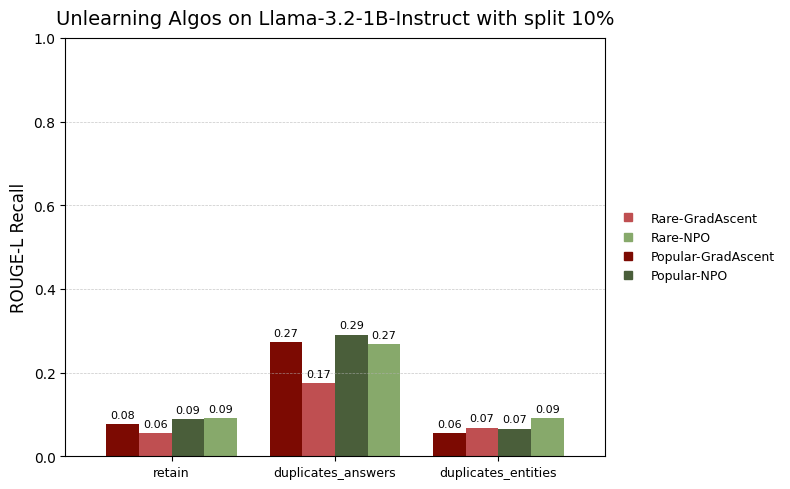

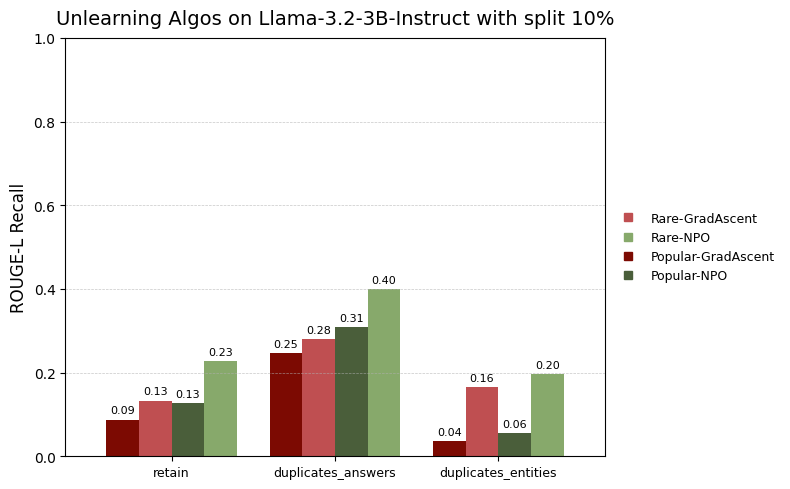

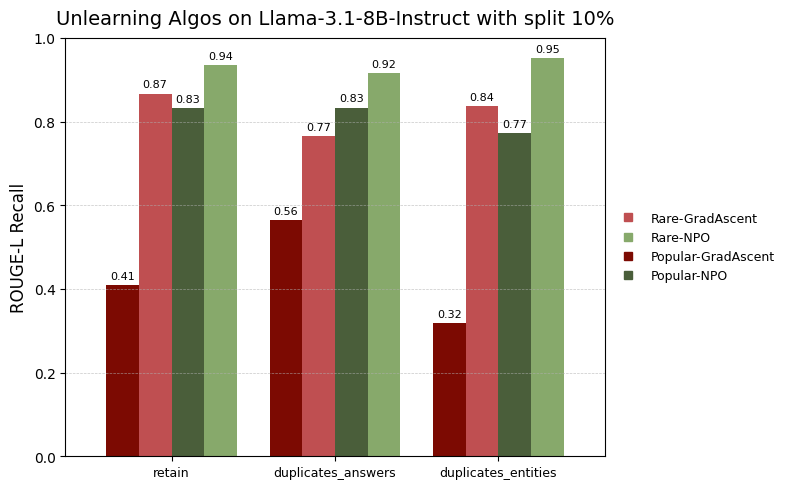

In [10]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Настройки и чтение ----------
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/eval_final_experiments"

models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
orig_splits = {
    'Rare': 'rare_forget10',
    'Popular': 'popular_forget10'
}
trainers = ["GradAscent", "NPO"]

# Сплиты для метрик
metric_splits = {
    'retain': 'retain_intersection80',
    'duplicates_answers': {
        'Rare': 'duplicate_answers_rare_forget10',
        'Popular': 'duplicate_answers_popular_forget10'
    },
    'duplicates_entities': {
        'Rare': 'duplicate_entities_rare_forget10',
        'Popular': 'duplicate_entities_popular_forget10'
    }
}

# Чтение данных: сбор по (model, category, trainer)
values = {}
for model in models:
    for cat, orig in orig_splits.items():
        df_tr = {}
        for tr in trainers:
            path_dir = os.path.join(BASE, model, f"{orig}_{tr}")
            tr_vals = {}
            # retain
            fn = os.path.join(path_dir, f"on_{metric_splits['retain']}", "PopQA_SUMMARY.json")
            try:
                tr_vals['retain'] = json.load(open(fn))['forget_Q_A_ROUGE']
            except:
                tr_vals['retain'] = np.nan
            # answers & entities
            for metric in ['duplicates_answers', 'duplicates_entities']:
                split = metric_splits[metric][cat]
                fn = os.path.join(path_dir, f"on_{split}", "PopQA_SUMMARY.json")
                try:
                    tr_vals[metric] = json.load(open(fn))['forget_Q_A_ROUGE']
                except:
                    tr_vals[metric] = np.nan
            df_tr[tr] = tr_vals
        values[(model, cat)] = pd.DataFrame(df_tr)

# ---------- 2. Построение графиков с разными цветами для Rare/Popular каждого алгоритма ----------
# Задаём цвет для каждой комбинации
combo_colors = {
    'Rare-GradAscent'      : '#bf4f51',    # любой табличный
    'Rare-NPO'             : '#87a96b',     # DarkGreen
    'Popular-GradAscent'   : '#7c0a02', 
    'Popular-NPO': "#4a5e3a" 
}

for model in models:
    # объединяем Rare и Popular
    df_plot = pd.concat(
        [values[(model, 'Rare')], values[(model, 'Popular')]],
        axis=1, keys=['Rare', 'Popular']
    )
    # переупорядочим MultiIndex колонок
    df_plot = df_plot.reorder_levels([1, 0], axis=1).sort_index(axis=1, level=0)
    df_plot.columns = [f"{cat}-{tr}" for tr, cat in df_plot.columns]

    # подбираем цвета
    colors = [combo_colors[col] for col in df_plot.columns]


    fig, ax = plt.subplots(figsize=(8, 5))
    df_plot.plot(kind='bar', width=0.8, color=colors, ax=ax)

    ax.set_title(f"Unlearning Algos on {model} with split 10%", fontsize=14, pad=10)
    ax.set_ylabel("ROUGE-L Recall", fontsize=12)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='x', rotation=0, labelsize=9)

    # подписи
    for bar in ax.patches:
        h = bar.get_height()
        ax.annotate(f"{h:.2f}",
                    xy=(bar.get_x()+bar.get_width()/2, h),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

    # легенда: комбинации
    handles = [plt.Line2D([], [], marker='s', color=combo_colors[c], linestyle='') 
               for c in combo_colors]
    ax.legend(handles, combo_colors.keys(),
              loc='center left', bbox_to_anchor=(1.0, 0.5),
              frameon=False, fontsize=9)

    plt.tight_layout()
    plt.show()


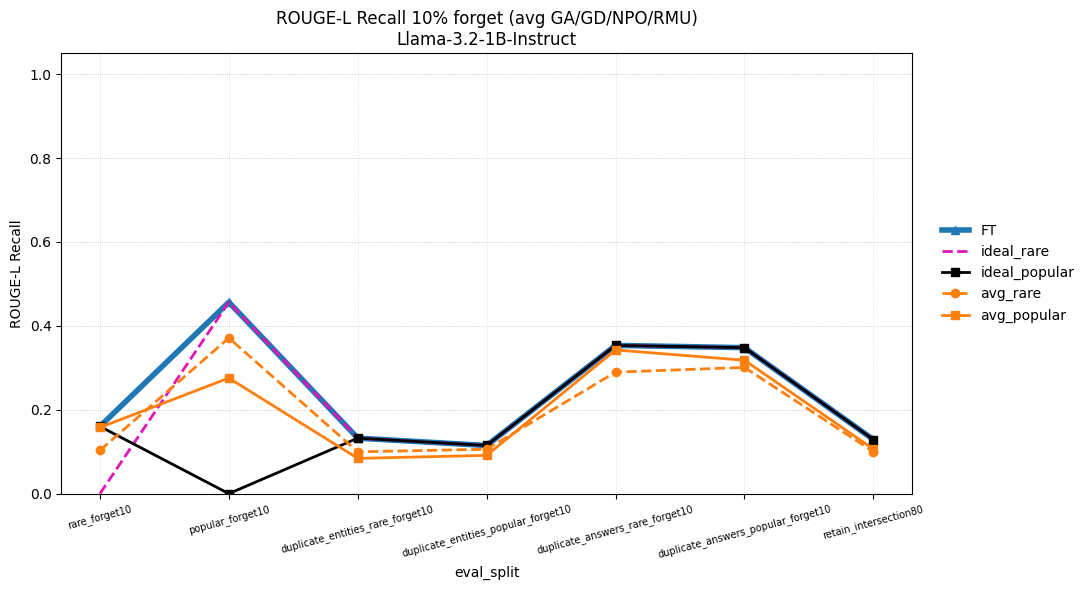

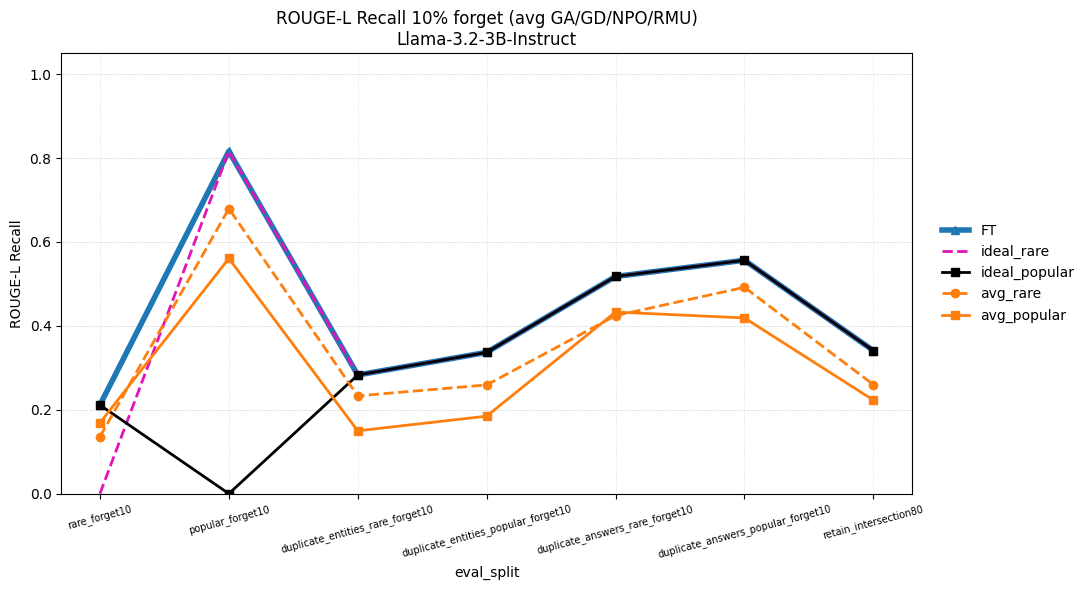

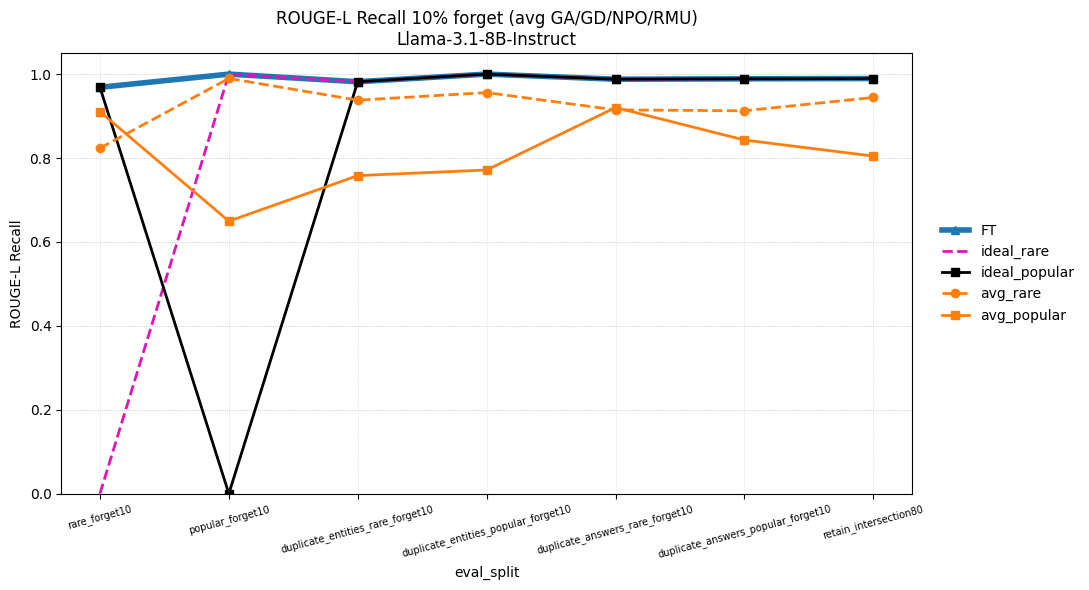

In [4]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Чтение данных ----------
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/eval_final_experiments"

models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
orig_splits = ["rare_forget10", "popular_forget10"]
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]

eval_splits = [
    "rare_forget10",
    "popular_forget10",
    "duplicate_entities_rare_forget10",
    "duplicate_entities_popular_forget10",
    "duplicate_answers_rare_forget10",
    "duplicate_answers_popular_forget10",
    "retain_intersection80",
]

# Собираем таблицы для каждой (model, orig_split)
tables = {}
for model in models:
    for orig in orig_splits:
        variants = ["FT"] + trainers
        data = {v: [] for v in variants}
        for v in variants:
            parent_dir = (
                os.path.join(BASE, model, "Original")
                if v == "FT"
                else os.path.join(BASE, model, f"{orig}_{v}")
            )
            for split in eval_splits:
                path = os.path.join(parent_dir, f"on_{split}", "PopQA_SUMMARY.json")
                try:
                    with open(path, "r") as f:
                        summary = json.load(f)
                    val = summary.get("forget_Q_A_ROUGE", np.nan)
                except (FileNotFoundError, json.JSONDecodeError):
                    val = np.nan
                data[v].append(val)
        df = pd.DataFrame(data, index=eval_splits)
        df.index.name = "eval_split"
        tables[(model, orig)] = df

# ---------- 2. Построение одного графика на модель ----------
ALGOS = trainers

def plot_model(model: str, save_dir: str | None = None):
    """Строит один график для заданной модели с avg_rare и avg_pop."""
    df_rare = tables[(model, "rare_forget10")]
    df_pop  = tables[(model, "popular_forget10")]

    # FT (должен быть одинаковым в обоих DF)
    ft_vals = df_rare["FT"].to_numpy()

    # Средние по алгоритмам для каждого eval_split
    avg_rare_vals = df_rare[ALGOS].mean(axis=1).to_numpy()
    avg_pop_vals  = df_pop [ALGOS].mean(axis=1).to_numpy()

    # ideal_* (копия FT с нулём в нужной точке)
    splits = df_rare.index.tolist()   # одинаковые индексы у обоих df
    ideal_rare = ft_vals.copy()
    if "rare_forget10" in splits:
        ideal_rare[splits.index("rare_forget10")] = 0

    ideal_pop = ft_vals.copy()
    if "popular_forget10" in splits:
        ideal_pop[splits.index("popular_forget10")] = 0

    # ---- Рисуем ----
    x = np.arange(len(splits))
    plt.figure(figsize=(11, 6))

    ft_color  = 'tab:blue'
    avg_color = 'tab:orange'

    plt.plot(x, ft_vals, '-^', color=ft_color, linewidth=4, label="FT")

    plt.plot(x, ideal_rare, '--', linewidth=2, color='#e014b8', label="ideal_rare")
    plt.plot(x, ideal_pop,  '-s', linewidth=2, color='black',   label="ideal_popular")

    plt.plot(x, avg_rare_vals, '--o', color=avg_color, linewidth=2, label="avg_rare")
    plt.plot(x, avg_pop_vals,  '-s',  color=avg_color, linewidth=2, label="avg_popular")

    plt.xticks(x, splits, fontsize=7, rotation=15)
    plt.ylabel("ROUGE-L Recall")
    plt.xlabel("eval_split")
    plt.title(f"ROUGE-L Recall 10% forget (avg GA/GD/NPO/RMU)\n{model}")
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle=':', linewidth=0.5)
    plt.grid(axis='x', linestyle='--', linewidth=0.4, alpha=0.4)
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)
    plt.tight_layout()

    if save_dir is not None:
        os.makedirs(save_dir, exist_ok=True)
        fname = f"{model.replace(' ', '_')}__rougel_recall10.png"
        plt.savefig(os.path.join(save_dir, fname), dpi=300, bbox_inches='tight')

    plt.show()

# ---------- 3. Запуск ----------
for m in models:
    plot_model(m, save_dir="plots_popqa_rougeL")


In [ ]:
# --- 1. Оригинальные значения (скопированы из твоего первого сообщения) ---
eval_index = [
    'rare_forget10',
    'popular_forget10',
    'duplicate_answers_rare_forget10',
    'duplicate_answers_popular_forget10',
    'duplicate_entities_rare_forget10',
    'duplicate_entities_popular_forget10',
    'retain_intersection80'
]

orig_10_1B = pd.DataFrame({
    'Orig model': [0.01403, 0.11432, 0.03108, 0.04431, 0.01818, 0.03061, 0.01888]
}, index=eval_index)

orig_10_3B = pd.DataFrame({
    'Orig model': [0.108081, 0.078231, 0.03571, 0.388177, 0.160249, 0.132823, 0.107264]
}, index=eval_index)

orig_10_8B = pd.DataFrame({
    'Orig model': [0.07526, 0.66542, 0.24670, 0.30766, 0.17879, 0.14966, 0.24441]
}, index=eval_index)

orig_dfs = {
    "Llama-3.2-1B-Instruct": orig_10_1B,
    "Llama-3.2-3B-Instruct": orig_10_3B,
    "Llama-3.1-8B-Instruct": orig_10_8B,
}

# --- 2. Делаем rare_10_* и popular_10_* из твоего словаря tables + добавляем столбец "Orig model" ---
def build_pair(model_name):
    rare_df    = tables[(model_name, "rare_forget10")].reindex(eval_index).join(orig_dfs[model_name])
    popular_df = tables[(model_name, "popular_forget10")].reindex(eval_index).join(orig_dfs[model_name])
    return rare_df, popular_df

rare_10_1B,    popular_10_1B    = build_pair("Llama-3.2-1B-Instruct")
rare_10_3B,    popular_10_3B    = build_pair("Llama-3.2-3B-Instruct")
rare_10_8B,    popular_10_8B    = build_pair("Llama-3.1-8B-Instruct")

# (опционально) проверим
for name, df in [("rare_10_1B", rare_10_1B), ("popular_10_1B", popular_10_1B),
                 ("rare_10_3B", rare_10_3B), ("popular_10_3B", popular_10_3B),
                 ("rare_10_8B", rare_10_8B), ("popular_10_8B", popular_10_8B)]:
    print(f"\n{name}")
    display(df)


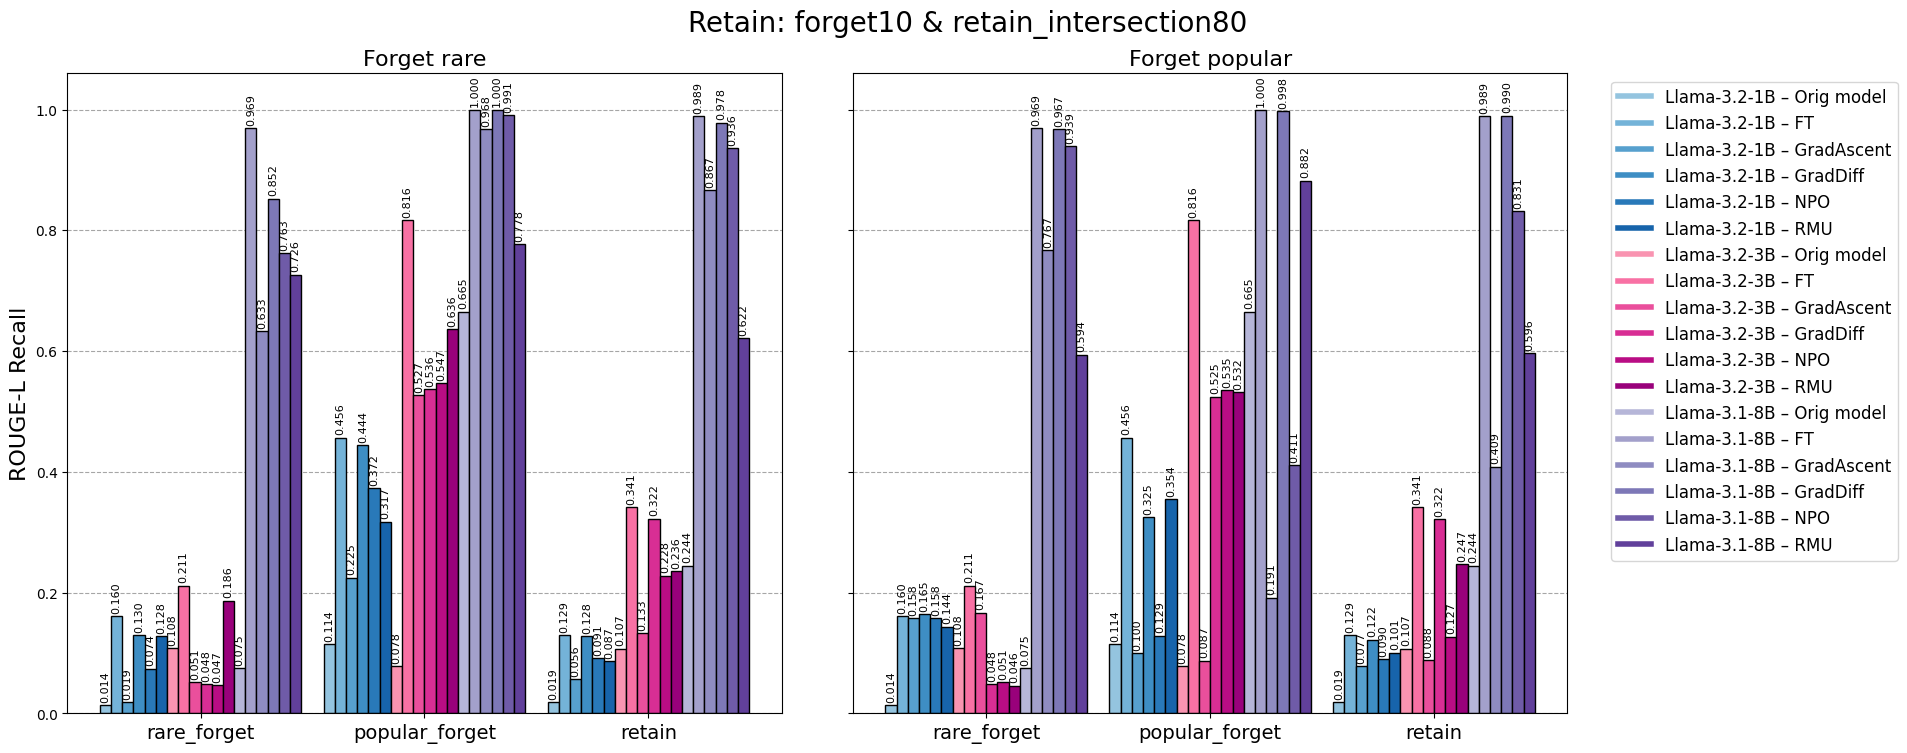

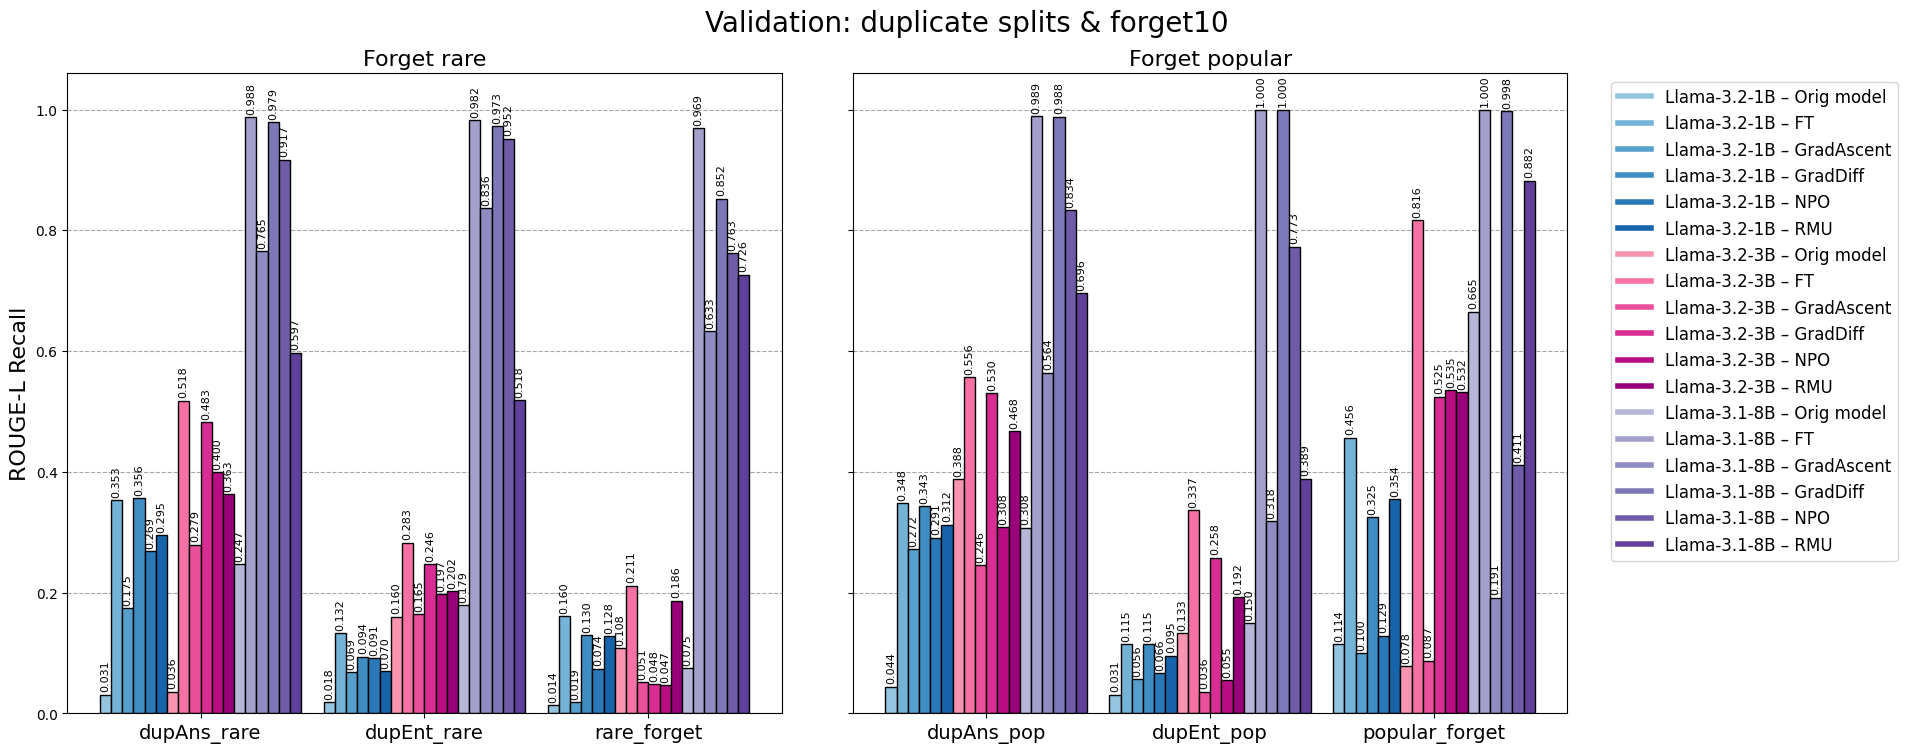

In [7]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Чтение твоих результатов
# -----------------------------
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/eval_final_experiments"

models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
orig_splits = ["rare_forget10", "popular_forget10"]
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]

eval_splits = [
    "rare_forget10",
    "popular_forget10",
    "duplicate_entities_rare_forget10",
    "duplicate_entities_popular_forget10",
    "duplicate_answers_rare_forget10",
    "duplicate_answers_popular_forget10",
    "retain_intersection80",
]

def load_tables(base, models, orig_splits, trainers, eval_splits):
    tables = {}
    for model in models:
        for orig in orig_splits:
            variants = ["FT"] + trainers
            data = {v: [] for v in variants}

            for v in variants:
                parent_dir = os.path.join(base, model, "Original" if v == "FT" else f"{orig}_{v}")
                for split in eval_splits:
                    summary_path = os.path.join(parent_dir, f"on_{split}", "PopQA_SUMMARY.json")
                    try:
                        with open(summary_path, "r") as f:
                            summary = json.load(f)
                        value = summary.get("forget_Q_A_ROUGE", np.nan)
                    except (FileNotFoundError, json.JSONDecodeError):
                        value = np.nan
                    data[v].append(value)

            df = pd.DataFrame(data, index=eval_splits)
            df.index.name = "eval_split"
            tables[(model, orig)] = df
    return tables

tables = load_tables(BASE, models, orig_splits, trainers, eval_splits)

# ---------------------------------------------------------
# 2. Подмешиваем столбец "Orig model" из старых таблиц
#    (скопируй определение orig_10_1B / 3B / 8B из твоего кода)
# ---------------------------------------------------------

# !!! ВСТАВЬ сюда определения orig_10_1B, orig_10_3B, orig_10_8B из предыдущего кода !!!

orig_dict = {
    "Llama-3.2-1B-Instruct": orig_10_1B,  # <- из старого кода
    "Llama-3.2-3B-Instruct": orig_10_3B,
    "Llama-3.1-8B-Instruct": orig_10_8B,
}

def build_model_sets(tables, orig_dict):
    model_sets = {}
    for model in orig_dict.keys():
        rare_df    = tables[(model, "rare_forget10")].reindex(orig_dict[model].index).join(orig_dict[model])
        popular_df = tables[(model, "popular_forget10")].reindex(orig_dict[model].index).join(orig_dict[model])
        model_sets[model] = {"rare": rare_df, "popular": popular_df}
    return model_sets

model_sets = build_model_sets(tables, orig_dict)

# ---------------------------------------------------------
# 3. Построение графиков (адаптация твоей функции)
# ---------------------------------------------------------

methods = ['Orig model', 'FT', 'GradAscent', 'GradDiff', 'NPO', 'RMU']

model_label_map = {
    "Llama-3.2-1B-Instruct": "Llama-3.2-1B",
    "Llama-3.2-3B-Instruct": "Llama-3.2-3B",
    "Llama-3.1-8B-Instruct": "Llama-3.1-8B",
}

short_names_1 = {
    'rare_forget10': 'rare_forget',
    'popular_forget10': 'popular_forget',
    'retain_intersection80': 'retain'
}
short_names_2 = {
    'duplicate_answers_rare_forget10': 'dupAns_rare',
    'duplicate_entities_rare_forget10': 'dupEnt_rare',
    'duplicate_answers_popular_forget10': 'dupAns_pop',
    'duplicate_entities_popular_forget10': 'dupEnt_pop',
    'rare_forget10': 'rare_forget',
    'popular_forget10': 'popular_forget'
}

# Цвета генерируем по числу методов для каждой модели
def get_colors(n, cmap_name):
    return plt.get_cmap(cmap_name)(np.linspace(0.4, 0.8, n))

colors_map = {
    "Llama-3.2-1B-Instruct": get_colors(len(methods), "Blues"),
    "Llama-3.2-3B-Instruct": get_colors(len(methods), "RdPu"),
    "Llama-3.1-8B-Instruct": get_colors(len(methods), "Purples"),
}

def plot_two_subplots(model_sets, methods, splits_rare, splits_pop, title, short_map):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    fig.suptitle(title, fontsize=20)

    n_models = len(model_sets)
    n_methods = len(methods)
    total_bars = n_models * n_methods

    group_width = 0.9
    bar_width = group_width / total_bars

    def offset(idx):
        return idx * bar_width - group_width / 2 + bar_width / 2

    # Верхняя граница оси Y
    all_vals = []
    for ms in model_sets.values():
        all_vals += list(ms['rare'][methods].to_numpy().flatten())
        all_vals += list(ms['popular'][methods].to_numpy().flatten())
    ylim_top = np.nanmax(all_vals) + 0.06

    # ---- RARE ----
    x_r = np.arange(len(splits_rare))
    for i, split in enumerate(splits_rare):
        for model_idx, (model_name, ms) in enumerate(model_sets.items()):
            for m_idx, method in enumerate(methods):
                idx = model_idx * n_methods + m_idx
                h = ms['rare'].loc[split, method]
                x = x_r[i] + offset(idx)
                axs[0].bar(x, h, bar_width, color=colors_map[model_name][m_idx], edgecolor='black')
                axs[0].text(x, h + 0.005, f"{h:.3f}", ha='center', va='bottom', rotation=90, fontsize=8)

    axs[0].set_xticks(x_r)
    axs[0].set_xticklabels([short_map[s] for s in splits_rare], fontsize=14)
    axs[0].set_title('Forget rare', fontsize=16)
    axs[0].set_ylabel('ROUGE-L Recall', fontsize=16)
    axs[0].set_ylim(0, ylim_top)
    axs[0].grid(axis='y', linestyle='--', color='gray', alpha=0.7)
    axs[0].set_axisbelow(True)

    # ---- POPULAR ----
    x_p = np.arange(len(splits_pop))
    for i, split in enumerate(splits_pop):
        for model_idx, (model_name, ms) in enumerate(model_sets.items()):
            for m_idx, method in enumerate(methods):
                idx = model_idx * n_methods + m_idx
                h = ms['popular'].loc[split, method]
                x = x_p[i] + offset(idx)
                axs[1].bar(x, h, bar_width, color=colors_map[model_name][m_idx], edgecolor='black')
                axs[1].text(x, h + 0.005, f"{h:.3f}", ha='center', va='bottom', rotation=90, fontsize=8)

    axs[1].set_xticks(x_p)
    axs[1].set_xticklabels([short_map[s] for s in splits_pop], fontsize=14)
    axs[1].set_title('Forget popular', fontsize=16)
    axs[1].set_ylim(0, ylim_top)
    axs[1].grid(axis='y', linestyle='--', color='gray', alpha=0.7)
    axs[1].set_axisbelow(True)

    # ---- Легенда ----
    handles, labels = [], []
    for model_name in model_sets.keys():
        for i, method in enumerate(methods):
            handles.append(plt.Line2D([0], [0], color=colors_map[model_name][i], lw=4))
            labels.append(f"{model_label_map[model_name]} – {method}")
    axs[1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

    fig.subplots_adjust(wspace=0.1, left=0.05, right=0.80, top=0.90, bottom=0.10)
    return fig

# -----------------------------
# 4. Рисуем
# -----------------------------
fig1 = plot_two_subplots(
    model_sets,
    methods,
    ['rare_forget10', 'popular_forget10', 'retain_intersection80'],
    ['rare_forget10', 'popular_forget10', 'retain_intersection80'],
    'Retain: forget10 & retain_intersection80',
    short_names_1
)

fig2 = plot_two_subplots(
    model_sets,
    methods,
    ['duplicate_answers_rare_forget10', 'duplicate_entities_rare_forget10', 'rare_forget10'],
    ['duplicate_answers_popular_forget10', 'duplicate_entities_popular_forget10', 'popular_forget10'],
    'Validation: duplicate splits & forget10',
    short_names_2
)

plt.show()


## MMLU

In [11]:
import os
import numpy as np
import pandas as pd
from tabulate import tabulate

# Корень проекта
PROJECT_ROOT = "/mnt/extremessd10tb/borisiuk/open-unlearning"
results_base = os.path.join(PROJECT_ROOT, "saves", "lm_eval")

models = [
    "Llama-3.1-8B-Instruct",
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
]
tasks = ["mmlu", "hellaswag"]
orig_splits = ["rare_forget10", "popular_forget10"]
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]

def parse_mmlu_value(path):
    """
    Ищет в таблице (*.txt) строчку, где первый столбец == 'mmlu',
    и возвращает число из столбца Value (7-е поле).
    Если нет файла или соответствующей строки — NaN.
    """
    if not os.path.isfile(path):
        return np.nan

    with open(path, 'r') as f:
        for line in f:
            if not line.startswith("|"):
                continue
            parts = [cell.strip() for cell in line.split("|")]
            # parts[1] — Tasks, parts[7] — Value
            if len(parts) > 7 and parts[1] == "mmlu":
                try:
                    return float(parts[7])
                except ValueError:
                    return np.nan
    return np.nan

def parse_hellaswag_acc_norm(path):
    """
    Ищет в таблице (*.txt) для задачи 'hellaswag' строку с метрикой 'acc_norm'
    и возвращает значение нормированной точности (7-е поле).
    Если файл или строка отсутствует — NaN.
    """
    if not os.path.isfile(path):
        return np.nan

    current_task = None
    with open(path, 'r') as f:
        for line in f:
            if not line.startswith("|"):
                continue
            parts = [cell.strip() for cell in line.split("|")]
            # Обновляем имя задачи, если оно есть в этой строке
            if len(parts) > 1 and parts[1]:
                current_task = parts[1]
            # Если текущее имя задачи hellaswag и метрика acc_norm — возвращаем Value
            if current_task == "hellaswag" and len(parts) > 7 and parts[5] == "acc_norm":
                try:
                    return float(parts[7])
                except ValueError:
                    return np.nan
    return np.nan

for model in models:
    for orig in orig_splits:
        # Варианты: FT-модель и unlearn-версии
        variants = [f"popqa_{model}"] + [f"unlearn_{orig}_{t}" for t in trainers]
        table_data = {v: {} for v in variants}

        for task in tasks:
            task_dir = os.path.join(results_base, model, task)
            for v in variants:
                txt_file = os.path.join(task_dir, f"{v}.txt")
                if task == "mmlu":
                    table_data[v][task] = parse_mmlu_value(txt_file)
                else:  # task == "hellaswag"
                    table_data[v][task] = parse_hellaswag_acc_norm(txt_file)

        # Собираем DataFrame и выводим таблицу
        df = pd.DataFrame.from_dict(table_data, orient='index', columns=tasks)
        df.index.name = "Variant"

        print(f"\n=== {model} | unlearn on '{orig}' ===\n")
        print(tabulate(df.reset_index(), headers="keys", tablefmt="github", showindex=False))



=== Llama-3.1-8B-Instruct | unlearn on 'rare_forget10' ===

| Variant                          |     mmlu |   hellaswag |
|----------------------------------|----------|-------------|
| popqa_Llama-3.1-8B-Instruct      | nan      |    nan      |
| unlearn_rare_forget10_GradAscent |   0.6695 |      0.7571 |
| unlearn_rare_forget10_GradDiff   |   0.6679 |      0.7472 |
| unlearn_rare_forget10_NPO        |   0.6687 |      0.7531 |
| unlearn_rare_forget10_RMU        |   0.6547 |      0.7497 |

=== Llama-3.1-8B-Instruct | unlearn on 'popular_forget10' ===

| Variant                             |     mmlu |   hellaswag |
|-------------------------------------|----------|-------------|
| popqa_Llama-3.1-8B-Instruct         | nan      |    nan      |
| unlearn_popular_forget10_GradAscent |   0.6588 |      0.7491 |
| unlearn_popular_forget10_GradDiff   |   0.6656 |      0.744  |
| unlearn_popular_forget10_NPO        |   0.6619 |      0.7488 |
| unlearn_popular_forget10_RMU        |   0.6486 | 

## Forget 5

In [ ]:
import os
import json
import numpy as np
import pandas as pd
from IPython.display import display

# Базовая директория с результатами eval для всех моделей (Original и unlearn)
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/forget_5/eval_final_experiments"

# Список моделей
models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
# Оригинальные сплиты, на которых проводилось unlearning
orig_splits = ["rare_forget5", "popular_forget5"]
# Алгоритмы unlearning
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]
# Список сплитов для оценки
eval_splits = [
    "rare_forget5",
    "popular_forget5",
    "duplicate_answers_rare_forget5",
    "duplicate_answers_popular_forget5",
    "duplicate_entities_rare_forget5",
    "duplicate_entities_popular_forget5",
    "retain_intersection90",
]

for model in models:
    for orig in orig_splits:
        # Спецварианты: FT (Original) и все unlearn-тренеры
        variants = ["FT"] + trainers
        # Словарь для хранения значений метрики
        data = {v: [] for v in variants}

        for v in variants:
            if v == "FT":
                parent_dir = os.path.join(BASE, model, "Original")
            else:
                parent_dir = os.path.join(BASE, model, f"{orig}_{v}")

            for split in eval_splits:
                summary_path = os.path.join(parent_dir, f"on_{split}", "PopQA_SUMMARY.json")
                try:
                    with open(summary_path, "r") as f:
                        summary = json.load(f)
                    # Извлекаем ROUGE-метрику (или другую, если нужно)
                    value = summary.get("forget_Q_A_ROUGE", np.nan)
                except (FileNotFoundError, json.JSONDecodeError):
                    value = np.nan
                data[v].append(value)

        # Создаем DataFrame и выводим в ноутбуке
        df = pd.DataFrame(data, index=eval_splits)
        df.index.name = "eval_split"

        print(f"\n=== Results for {model}, unlearn on '{orig}' ===")
        display(
            df.style
              .set_caption(f"{model} — unlearn on '{orig}'")
              .format(precision=4)
        )


=== Results for Llama-3.2-1B-Instruct, unlearn on 'rare_forget5' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget5,nan,0.1211,0.1572,0.1447,0.1688
popular_forget5,nan,0.4241,0.4264,0.4379,0.3747
duplicate_answers_rare_forget5,nan,0.4455,0.4513,0.4570,0.4414
duplicate_answers_popular_forget5,nan,0.4535,0.4641,0.4627,0.4179
duplicate_entities_rare_forget5,nan,0.0861,0.0805,0.0768,0.0506
duplicate_entities_popular_forget5,nan,0.1250,0.1250,0.1233,0.0983
retain_intersection90,nan,0.1391,0.1430,0.1421,0.1107



=== Results for Llama-3.2-1B-Instruct, unlearn on 'popular_forget5' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget5,nan,0.1871,0.1824,0.1850,0.1630
popular_forget5,nan,0.3862,0.4103,0.3862,0.3230
duplicate_answers_rare_forget5,nan,0.4688,0.4622,0.4622,0.4217
duplicate_answers_popular_forget5,nan,0.4415,0.4357,0.4305,0.4025
duplicate_entities_rare_forget5,nan,0.0674,0.0618,0.0562,0.0674
duplicate_entities_popular_forget5,nan,0.1283,0.1250,0.1200,0.1000
retain_intersection90,nan,0.1410,0.1417,0.1426,0.1117



=== Results for Llama-3.2-3B-Instruct, unlearn on 'rare_forget5' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget5,0.2610,0.1824,0.2091,0.1950,0.1997
popular_forget5,0.8103,0.8207,0.8138,0.8138,0.6115
duplicate_answers_rare_forget5,0.5911,0.5673,0.5821,0.5731,0.4622
duplicate_answers_popular_forget5,0.6526,0.6372,0.6475,0.6413,0.4976
duplicate_entities_rare_forget5,0.2921,0.2978,0.2978,0.3071,0.1910
duplicate_entities_popular_forget5,0.3450,0.3400,0.3400,0.3500,0.2567
retain_intersection90,0.3526,0.3473,0.3523,0.3485,0.2421



=== Results for Llama-3.2-3B-Instruct, unlearn on 'popular_forget5' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget5,0.2610,0.2547,0.2558,0.2563,0.1693
popular_forget5,0.8103,0.7655,0.7897,0.7862,0.6115
duplicate_answers_rare_forget5,0.5911,0.5854,0.5928,0.5870,0.4973
duplicate_answers_popular_forget5,0.6526,0.6602,0.6537,0.6526,0.5445
duplicate_entities_rare_forget5,0.2921,0.2809,0.2865,0.2921,0.2416
duplicate_entities_popular_forget5,0.3450,0.3550,0.3400,0.3400,0.2350
retain_intersection90,0.3526,0.3518,0.3535,0.3525,0.2600



=== Results for Llama-3.1-8B-Instruct, unlearn on 'rare_forget5' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget5,0.9670,0.9051,0.9146,0.9051,0.7814
popular_forget5,1.0000,1.0000,1.0000,1.0000,0.9253
duplicate_answers_rare_forget5,0.9943,0.9934,0.9943,0.9926,0.7356
duplicate_answers_popular_forget5,0.9969,0.9897,0.9928,0.9887,0.7334
duplicate_entities_rare_forget5,0.9775,0.9888,0.9888,0.9888,0.7566
duplicate_entities_popular_forget5,1.0000,1.0000,0.9900,1.0000,0.8150
retain_intersection90,0.9889,0.9878,0.9883,0.9877,0.7771



=== Results for Llama-3.1-8B-Instruct, unlearn on 'popular_forget5' ===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget5,0.9670,0.9701,0.9670,0.9670,0.8873
popular_forget5,1.0000,0.9931,1.0000,0.9931,0.9621
duplicate_answers_rare_forget5,0.9943,0.9943,0.9943,0.9943,0.9516
duplicate_answers_popular_forget5,0.9969,0.9959,0.9949,0.9938,0.9497
duplicate_entities_rare_forget5,0.9775,0.9888,0.9775,0.9775,0.7921
duplicate_entities_popular_forget5,1.0000,0.9900,0.9900,1.0000,0.8100
retain_intersection90,0.9889,0.9882,0.9894,0.9894,0.8896


## Forget 15

In [7]:
import os
import json
import numpy as np
import pandas as pd
from IPython.display import display

# Базовая директория с результатами eval для forget_15 экспериментов
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/forget_15/eval_final_experiments"

# Список моделей и соответствующих им меток FT
models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
# Оригинальные сплиты и алгоритмы unlearning
orig_splits = ["rare_forget15", "popular_forget15"]
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]
# Сплиты для оценки
eval_splits = [
    "rare_forget15",
    "popular_forget15",
    "duplicate_answers_rare_forget15",
    "duplicate_answers_popular_forget15",
    "duplicate_entities_rare_forget15",
    "duplicate_entities_popular_forget15",
    "retain_intersection70",
]

# Проходим по каждой модели и каждому оригинальному сплиту
for model in models:
    for orig in orig_splits:
        variants = ["FT"] + trainers
        data = {v: [] for v in variants}

        for v in variants:
            if v == "FT":
                # Оригинальная fine-tuned модель
                parent_dir = os.path.join(BASE, model, "Original")
            else:
                # Unlearned модели
                parent_dir = os.path.join(BASE, model, f"{orig}_{v}")

            for split in eval_splits:
                summary_file = os.path.join(parent_dir, f"on_{split}", "PopQA_SUMMARY.json")
                try:
                    with open(summary_file, "r") as f:
                        summary = json.load(f)
                    # Извлекаем нужную метрику, например forget_Q_A_ROUGE
                    metric = summary.get("forget_Q_A_ROUGE", np.nan)
                except (FileNotFoundError, json.JSONDecodeError):
                    metric = np.nan
                data[v].append(metric)

        # Формируем и выводим DataFrame
        df = pd.DataFrame(data, index=eval_splits)
        df.index.name = "eval_split"
        caption = f"{model} — unlearn on '{orig}'"

        print(f"\n=== Results for {model}, unlearn on '{orig}'===")
        display(
            df.style
              .set_caption(caption)
              .format(precision=4)
        )

# Дополнительно можно сохранить каждый df в CSV:
#    out_csv = f"metrics_{model}_{orig}.csv"
#    df.to_csv(out_csv)
#    print(f"Saved CSV: {out_csv}")



=== Results for Llama-3.2-1B-Instruct, unlearn on 'rare_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,0.1355,0.0064,0.0682,0.0289,0.1175
popular_forget15,0.4100,0.0112,0.3590,0.1782,0.3026
duplicate_answers_rare_forget15,0.3286,0.0360,0.2903,0.1439,0.2681
duplicate_answers_popular_forget15,0.2850,0.0230,0.2760,0.1312,0.2402
duplicate_entities_rare_forget15,0.1141,0.0115,0.0833,0.0628,0.0737
duplicate_entities_popular_forget15,0.0862,0.0086,0.0690,0.0575,0.0638
retain_intersection70,0.1170,0.0073,0.1002,0.0471,0.0850



=== Results for Llama-3.2-1B-Instruct, unlearn on 'popular_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,0.1355,0.0072,0.1153,0.1007,0.1172
popular_forget15,0.4100,0.0052,0.0417,0.0187,0.3305
duplicate_answers_rare_forget15,0.3286,0.0115,0.2116,0.1780,0.2654
duplicate_answers_popular_forget15,0.2850,0.0113,0.1559,0.1202,0.2192
duplicate_entities_rare_forget15,0.1141,0.0013,0.0199,0.0192,0.0929
duplicate_entities_popular_forget15,0.0862,0.0000,0.0420,0.0172,0.0529
retain_intersection70,0.1170,0.0044,0.0509,0.0370,0.0813



=== Results for Llama-3.2-3B-Instruct, unlearn on 'rare_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,0.2196,0.0000,0.0974,0.0192,0.1687
popular_forget15,0.7842,0.0000,0.6944,0.4568,0.6008
duplicate_answers_rare_forget15,0.4822,0.0000,0.3660,0.1300,0.3778
duplicate_answers_popular_forget15,0.5089,0.0000,0.4207,0.1686,0.3667
duplicate_entities_rare_forget15,0.2603,0.0000,0.1814,0.0987,0.1667
duplicate_entities_popular_forget15,0.2805,0.0000,0.1741,0.0672,0.1552
retain_intersection70,0.3275,0.0000,0.2327,0.0911,0.2071



=== Results for Llama-3.2-3B-Instruct, unlearn on 'popular_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,0.2196,0.0024,0.1618,nan,nan
popular_forget15,0.7842,0.0000,0.0430,nan,nan
duplicate_answers_rare_forget15,0.4822,0.0000,0.2878,nan,nan
duplicate_answers_popular_forget15,0.5089,0.0000,0.2226,nan,nan
duplicate_entities_rare_forget15,0.2603,0.0000,0.0346,nan,nan
duplicate_entities_popular_forget15,0.2805,0.0000,0.0218,nan,nan
retain_intersection70,0.3275,0.0001,nan,nan,nan



=== Results for Llama-3.1-8B-Instruct, unlearn on 'rare_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,0.9732,0.0000,0.4544,0.0472,0.7409
popular_forget15,0.9988,0.0000,0.9581,0.5911,0.5397
duplicate_answers_rare_forget15,0.9926,0.0000,0.7201,0.1755,0.5441
duplicate_answers_popular_forget15,0.9898,0.0000,0.7672,0.2456,0.5023
duplicate_entities_rare_forget15,0.9904,0.0000,0.7699,0.1968,0.2724
duplicate_entities_popular_forget15,0.9983,0.0000,0.7891,0.1925,0.3989
retain_intersection70,0.9897,0.0000,0.7281,0.1865,0.3542



=== Results for Llama-3.1-8B-Instruct, unlearn on 'popular_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,0.9732,0.0000,0.8323,0.4007,0.3122
popular_forget15,0.9988,0.0000,0.1826,0.0121,0.8177
duplicate_answers_rare_forget15,0.9926,0.0000,0.7503,0.3025,0.5333
duplicate_answers_popular_forget15,0.9898,0.0000,0.5974,0.2313,0.4932
duplicate_entities_rare_forget15,0.9904,0.0000,0.4699,0.0712,0.2442
duplicate_entities_popular_forget15,0.9983,0.0000,0.4293,0.1155,0.1764
retain_intersection70,0.9897,0.0000,0.5458,0.1388,0.3104


In [ ]:
import os
import json
import numpy as np
import pandas as pd
from IPython.display import display

# Базовая директория с результатами eval для forget_15 экспериментов
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/forget_15/lr_1e-5/eval_final_experiments"

# Список моделей и соответствующих им меток FT
models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
# Оригинальные сплиты и алгоритмы unlearning
orig_splits = ["rare_forget15", "popular_forget15"]
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]
# Сплиты для оценки
eval_splits = [
    "rare_forget15",
    "popular_forget15",
    "duplicate_answers_rare_forget15",
    "duplicate_answers_popular_forget15",
    "duplicate_entities_rare_forget15",
    "duplicate_entities_popular_forget15",
    "retain_intersection70",
]

# Проходим по каждой модели и каждому оригинальному сплиту
for model in models:
    for orig in orig_splits:
        variants = ["FT"] + trainers
        data = {v: [] for v in variants}

        for v in variants:
            if v == "FT":
                # Оригинальная fine-tuned модель
                parent_dir = os.path.join(BASE, model, "Original")
            else:
                # Unlearned модели
                parent_dir = os.path.join(BASE, model, f"{orig}_{v}")

            for split in eval_splits:
                summary_file = os.path.join(parent_dir, f"on_{split}", "PopQA_SUMMARY.json")
                try:
                    with open(summary_file, "r") as f:
                        summary = json.load(f)
                    # Извлекаем нужную метрику, например forget_Q_A_ROUGE
                    metric = summary.get("forget_Q_A_ROUGE", np.nan)
                except (FileNotFoundError, json.JSONDecodeError):
                    metric = np.nan
                data[v].append(metric)

        # Формируем и выводим DataFrame
        df = pd.DataFrame(data, index=eval_splits)
        df.index.name = "eval_split"
        caption = f"{model} — unlearn on '{orig}'"
import os
import json
import numpy as np
import pandas as pd
from IPython.display import display

# Базовая директория с результатами eval для forget_15 экспериментов
BASE = "/mnt/extremessd10tb/borisiuk/open-unlearning/saves/eval/forget_15/lr_1e-5/eval_final_experiments"

# Список моделей и соответствующих им меток FT
models = [
    "Llama-3.2-1B-Instruct",
    "Llama-3.2-3B-Instruct",
    "Llama-3.1-8B-Instruct",
]
# Оригинальные сплиты и алгоритмы unlearning
orig_splits = ["rare_forget15", "popular_forget15"]
trainers = ["GradAscent", "GradDiff", "NPO", "RMU"]
# Сплиты для оценки
eval_splits = [
    "rare_forget15",
    "popular_forget15",
    "duplicate_answers_rare_forget15",
    "duplicate_answers_popular_forget15",
    "duplicate_entities_rare_forget15",
    "duplicate_entities_popular_forget15",
    "retain_intersection70",
]

# Проходим по каждой модели и каждому оригинальному сплиту
for model in models:
    for orig in orig_splits:
        variants = ["FT"] + trainers
        data = {v: [] for v in variants}

        for v in variants:
            if v == "FT":
                # Оригинальная fine-tuned модель
                parent_dir = os.path.join(BASE, model, "Original")
            else:
                # Unlearned модели
                parent_dir = os.path.join(BASE, model, f"{orig}_{v}")

            for split in eval_splits:
                summary_file = os.path.join(parent_dir, f"on_{split}", "PopQA_SUMMARY.json")
                try:
                    with open(summary_file, "r") as f:
                        summary = json.load(f)
                    # Извлекаем нужную метрику, например forget_Q_A_ROUGE
                    metric = summary.get("forget_Q_A_ROUGE", np.nan)
                except (FileNotFoundError, json.JSONDecodeError):
                    metric = np.nan
                data[v].append(metric)

        # Формируем и выводим DataFrame
        df = pd.DataFrame(data, index=eval_splits)
        df.index.name = "eval_split"
        caption = f"{model} — unlearn on '{orig}'"

        print(f"\n=== Results for {model}, unlearn on '{orig}'===")
        display(
            df.style
              .set_caption(caption)
              .format(precision=4)
        )

# Дополнительно можно сохранить каждый df в CSV:
#    out_csv = f"metrics_{model}_{orig}.csv"
#    df.to_csv(out_csv)
#    print(f"Saved CSV: {out_csv}")

        print(f"\n=== Results for {model}, unlearn on '{orig}'===")
        display(
            df.style
              .set_caption(caption)
              .format(precision=4)
        )

# Дополнительно можно сохранить каждый df в CSV:
#    out_csv = f"metrics_{model}_{orig}.csv"
#    df.to_csv(out_csv)
#    print(f"Saved CSV: {out_csv}")



=== Results for Llama-3.2-1B-Instruct, unlearn on 'rare_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,nan,0.1024,0.1290,0.1167,0.1323
popular_forget15,nan,0.3671,0.4106,0.3997,0.3861
duplicate_answers_rare_forget15,nan,0.3062,0.3319,0.3310,0.2966
duplicate_answers_popular_forget15,nan,0.2751,0.2859,0.2993,0.2569
duplicate_entities_rare_forget15,nan,0.0705,0.1026,0.0962,0.0910
duplicate_entities_popular_forget15,nan,0.0810,0.0828,0.0891,0.0661
retain_intersection70,nan,0.1020,0.1179,0.1103,0.1053



=== Results for Llama-3.2-1B-Instruct, unlearn on 'popular_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,nan,0.1426,0.1395,0.1391,0.1230
popular_forget15,nan,0.2007,0.3820,0.2764,0.3774
duplicate_answers_rare_forget15,nan,0.3097,0.3298,0.3256,0.3030
duplicate_answers_popular_forget15,nan,0.2600,0.2772,0.2635,0.2706
duplicate_entities_rare_forget15,nan,0.0590,0.0801,0.0705,0.0718
duplicate_entities_popular_forget15,nan,0.0805,0.0885,0.0868,0.0713
retain_intersection70,nan,0.0951,0.1148,0.1047,0.1051



=== Results for Llama-3.2-3B-Instruct, unlearn on 'rare_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,nan,0.1687,0.2059,0.1871,0.1888
popular_forget15,nan,0.7419,0.7899,0.7560,0.7612
duplicate_answers_rare_forget15,nan,0.4250,0.4910,0.4584,0.4536
duplicate_answers_popular_forget15,nan,0.4739,0.5103,0.4974,0.4716
duplicate_entities_rare_forget15,nan,0.2128,0.2487,0.2167,0.2442
duplicate_entities_popular_forget15,nan,0.2201,0.2989,0.2437,0.2649
retain_intersection70,nan,0.2727,0.3265,0.2980,0.3092



=== Results for Llama-3.2-3B-Instruct, unlearn on 'popular_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,nan,0.1903,0.2159,0.2076,0.1990
popular_forget15,nan,0.2563,0.7554,0.3373,0.7392
duplicate_answers_rare_forget15,nan,0.4028,0.4894,0.4351,0.4591
duplicate_answers_popular_forget15,nan,0.3554,0.5071,0.3978,0.4848
duplicate_entities_rare_forget15,nan,0.0667,0.2654,0.0917,0.2353
duplicate_entities_popular_forget15,nan,0.0983,0.2874,0.1201,0.2230
retain_intersection70,nan,0.1939,0.3259,0.2343,0.3084



=== Results for Llama-3.1-8B-Instruct, unlearn on 'rare_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,nan,0.9412,0.9594,0.9544,0.9312
popular_forget15,nan,0.9975,0.9988,0.9975,0.9944
duplicate_answers_rare_forget15,nan,0.9889,0.9926,0.9873,0.9730
duplicate_answers_popular_forget15,nan,0.9792,0.9889,0.9836,0.9708
duplicate_entities_rare_forget15,nan,0.9846,0.9942,0.9904,0.9788
duplicate_entities_popular_forget15,nan,0.9948,0.9983,0.9948,0.9862
retain_intersection70,nan,0.9849,0.9884,0.9876,0.9777



=== Results for Llama-3.1-8B-Instruct, unlearn on 'popular_forget15'===


,FT,GradAscent,GradDiff,NPO,RMU
eval_split,,,,,
rare_forget15,nan,0.9409,0.9741,0.9720,0.9492
popular_forget15,nan,0.4992,0.9969,0.9416,0.9861
duplicate_answers_rare_forget15,nan,0.9280,0.9926,0.9921,0.9683
duplicate_answers_popular_forget15,nan,0.8559,0.9913,0.9821,0.9700
duplicate_entities_rare_forget15,nan,0.7974,0.9942,0.9750,0.9423
duplicate_entities_popular_forget15,nan,0.7684,0.9983,0.9862,0.9569
retain_intersection70,nan,0.8421,0.9902,0.9849,0.9741
